# Exploratory Data Analysis

Looking at trends and making charts with our dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/2018-2021_receiving.csv', index_col = 'Player')
df.head()

,Tm,Age,G,GS,Tgt,Rec,Yds,TD,1D,YBC,...,G_-2_year,GS_-2_year,Tgt_-2_year,Rec_-2_year,Yds_-2_year,TD_-2_year,Rnd,Pick,Pos,YrsPlayed
Player,,,,,,,,,,,,,,,,,,,,,
Cooper Kupp,LAR,28,17,17,191,145,1947,16,89.0,1101,...,16.0,14.0,134.0,94.0,1161.0,10.0,3.0,69.0,WR,4.0
Davante Adams,GNB,29,16,16,169,123,1553,11,84.0,961,...,12.0,12.0,127.0,83.0,997.0,5.0,2.0,53.0,WR,7.0
Tyreek Hill,KAN,27,17,16,159,111,1239,9,75.0,795,...,12.0,12.0,89.0,58.0,860.0,7.0,5.0,165.0,WR,5.0
Justin Jefferson,MIN,22,17,17,167,108,1616,10,75.0,1134,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.0,WR,1.0
Mark Andrews,BAL,26,17,9,153,107,1361,9,75.0,903,...,15.0,4.0,98.0,64.0,852.0,10.0,3.0,86.0,TE,3.0


## Age Distribution

In [4]:
df['Age'].describe()

count    1847.000000
mean       25.755279
std         2.978015
min        21.000000
25%        24.000000
50%        25.000000
75%        27.000000
max        39.000000
Name: Age, dtype: float64

Who is the oldest player?

In [6]:
df[df['Age'] == 39]

,Tm,Age,G,GS,Tgt,Rec,Yds,TD,1D,YBC,...,G_-2_year,GS_-2_year,Tgt_-2_year,Rec_-2_year,Yds_-2_year,TD_-2_year,Rnd,Pick,Pos,YrsPlayed
Player,,,,,,,,,,,,,,,,,,,,,
Ben Watson,NWE,39,10,8,24,17,173,0,9.0,90,...,16.0,12.0,79.0,61.0,522.0,4.0,1.0,32.0,TE,15.0


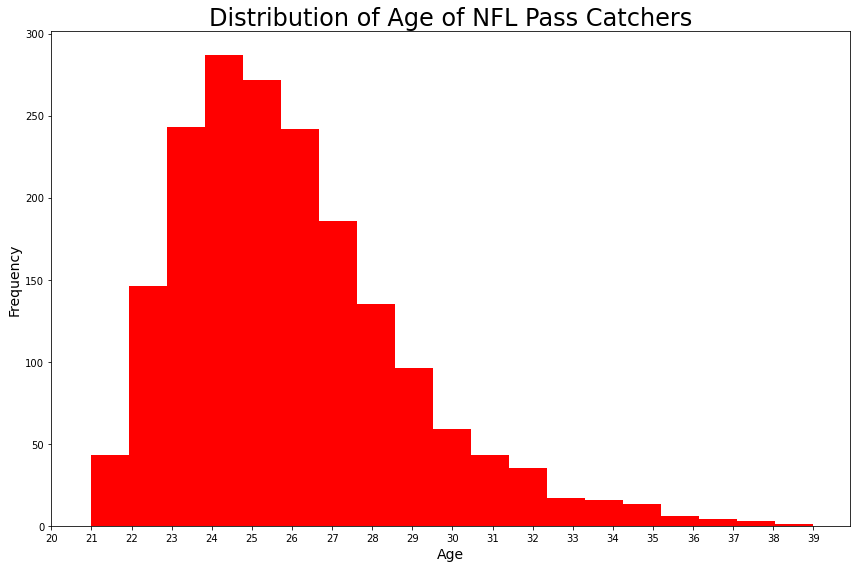

In [5]:
plt.figure(figsize = (12, 8))

plt.hist(df['Age'], color = 'red', bins = 19)

plt.title('Distribution of Age of NFL Pass Catchers', size = 24);
plt.xlabel('Age', size = 14)
plt.ylabel('Frequency', size = 14)

plt.xticks([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

plt.tight_layout();
plt.savefig('../images/player_age.png');

In [6]:
df.groupby('Pos')['Age'].mean()

Pos
RB    25.261950
TE    26.450673
WR    25.695900
Name: Age, dtype: float64

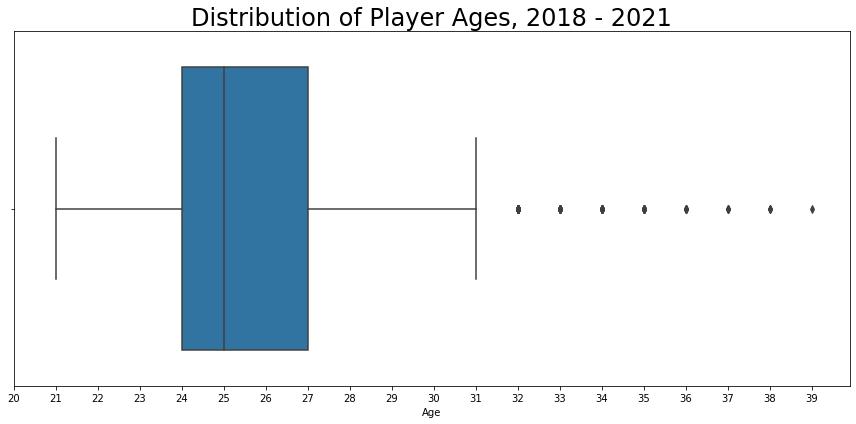

In [7]:
plt.figure(figsize = (12, 6))

plt.title('Distribution of Player Ages, 2018 - 2021', size = 24)
sns.boxplot(x = df['Age'])
plt.xticks([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

plt.tight_layout();
plt.savefig('../images/player_age_boxplot.png');

In [8]:
df['Rnd'].value_counts(ascending = True)

7.0     79
6.0    134
5.0    172
4.0    203
1.0    211
3.0    214
2.0    237
8.0    597
Name: Rnd, dtype: int64

## Top 10 Yardage between 2018 and 2021

In [9]:
df[df['Pos'] == 'WR'].sort_values(by = 'Yds', ascending = False)[['Age', 'Tm', 'Yds', 'TD', 'Year']].head(10)

,Age,Tm,Yds,TD,Year
Player,,,,,
Cooper Kupp,28,LAR,1947,16,2021
Michael Thomas,26,NOR,1725,9,2019
Julio Jones,29,ATL,1677,8,2018
Justin Jefferson,22,MIN,1616,10,2021
DeAndre Hopkins,26,HOU,1572,11,2018
Davante Adams,29,GNB,1553,11,2021
Stefon Diggs,27,BUF,1535,8,2020
Mike Evans,25,TAM,1524,8,2018
Tyreek Hill,24,KAN,1479,12,2018


In [10]:
df[df['Pos'] == 'RB'].sort_values(by = 'Yds', ascending = False)[['Age', 'Tm', 'Yds', 'TD', 'Year']].head(10)

,Age,Tm,Yds,TD,Year
Player,,,,,
Christian McCaffrey,23,CAR,1005,4,2019
Austin Ekeler,24,LAC,993,8,2019
Christian McCaffrey,22,CAR,867,6,2018
Alvin Kamara,25,NOR,756,5,2020
James White,26,NWE,751,7,2018
Tarik Cohen,23,CHI,725,5,2018
Saquon Barkley,21,NYG,721,4,2018
Alvin Kamara,23,NOR,709,4,2018
Austin Ekeler,26,LAC,647,8,2021


In [11]:
df[df['Pos'] == 'TE'].sort_values(by = 'Yds', ascending = False)[['Age', 'Tm', 'Yds', 'TD', 'Year']].head(10)

,Age,Tm,Yds,TD,Year
Player,,,,,
Travis Kelce,31,KAN,1416,11,2020
George Kittle,25,SFO,1377,5,2018
Mark Andrews,26,BAL,1361,9,2021
Travis Kelce,29,KAN,1336,10,2018
Travis Kelce,30,KAN,1229,5,2019
Darren Waller,28,LVR,1196,9,2020
Zach Ertz,28,PHI,1163,8,2018
Darren Waller,27,OAK,1145,3,2019
Travis Kelce,32,KAN,1125,9,2021


## Top 10 Touchdowns

In [12]:
df[df['Pos'] == 'WR'].sort_values(by = 'TD', ascending = False)[['Age', 'Tm', 'Yds', 'TD', 'Year']].head(10)

,Age,Tm,Yds,TD,Year
Player,,,,,
Davante Adams,28,GNB,1374,18,2020
Cooper Kupp,28,LAR,1947,16,2021
Tyreek Hill,26,KAN,1276,15,2020
Antonio Brown,30,PIT,1297,15,2018
Adam Thielen,30,MIN,925,14,2020
Mike Evans,28,TAM,1035,14,2021
Davante Adams,26,GNB,1386,13,2018
Mike Evans,27,TAM,1006,13,2020
Ja'Marr Chase,21,CIN,1455,13,2021


In [13]:
df[df['Pos'] == 'TE'].sort_values(by = 'TD', ascending = False)[['Age', 'Tm', 'Yds', 'TD', 'Year']].head(10)

,Age,Tm,Yds,TD,Year
Player,,,,,
Eric Ebron,25,IND,750,13,2018
Robert Tonyan,26,GNB,586,11,2020
Travis Kelce,31,KAN,1416,11,2020
Mark Andrews,24,BAL,852,10,2019
Travis Kelce,29,KAN,1336,10,2018
Mark Andrews,26,BAL,1361,9,2021
Dawson Knox,25,BUF,587,9,2021
Darren Waller,28,LVR,1196,9,2020
Travis Kelce,32,KAN,1125,9,2021


In [14]:
df[df['Pos'] == 'RB'].sort_values(by = 'TD', ascending = False)[['Age', 'Tm', 'Yds', 'TD', 'Year']].head(10)

,Age,Tm,Yds,TD,Year
Player,,,,,
Austin Ekeler,26,LAC,647,8,2021
Austin Ekeler,24,LAC,993,8,2019
James White,26,NWE,751,7,2018
Kareem Hunt,23,KAN,378,7,2018
Christian McCaffrey,22,CAR,867,6,2018
Aaron Jones,27,GNB,391,6,2021
Jamaal Williams,24,GNB,253,5,2019
Kareem Hunt,25,CLE,304,5,2020
Kenyan Drake,24,MIA,477,5,2018


## Touchdown Distribution

In [31]:
df['TD'].describe()

count    1847.000000
mean        1.776936
std         2.459432
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        18.000000
Name: TD, dtype: float64

In [36]:
df[df['TD'] == 18]

,Tm,Age,G,GS,Tgt,Rec,Yds,TD,1D,YBC,...,G_-2_year,GS_-2_year,Tgt_-2_year,Rec_-2_year,Yds_-2_year,TD_-2_year,Rnd,Pick,Pos,YrsPlayed
Player,,,,,,,,,,,,,,,,,,,,,
Davante Adams,GNB,28,14,14,149,115,1374,18,73.0,777,...,15.0,15.0,169.0,111.0,1386.0,13.0,2.0,53.0,WR,6.0


## Yards vs Touchdowns

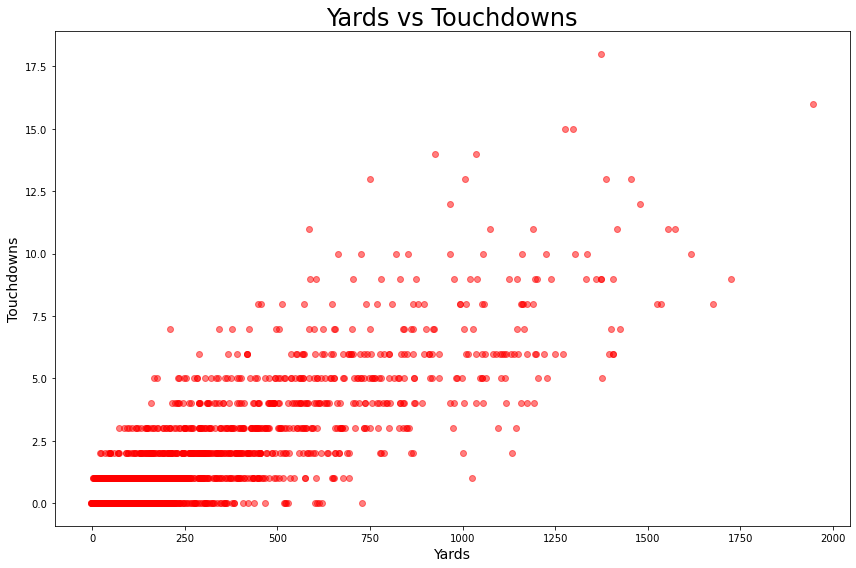

In [29]:
plt.figure(figsize = (12, 8))

plt.scatter(df['Yds'],
            df['TD'],
           color = 'red', alpha = 0.5, label = 'WR')

plt.title('Yards vs Touchdowns', size = 24)
plt.xlabel('Yards', size = 14)
plt.ylabel('Touchdowns', size = 14)

plt.tight_layout();
plt.savefig('../images/yards_vs_TDs.png');

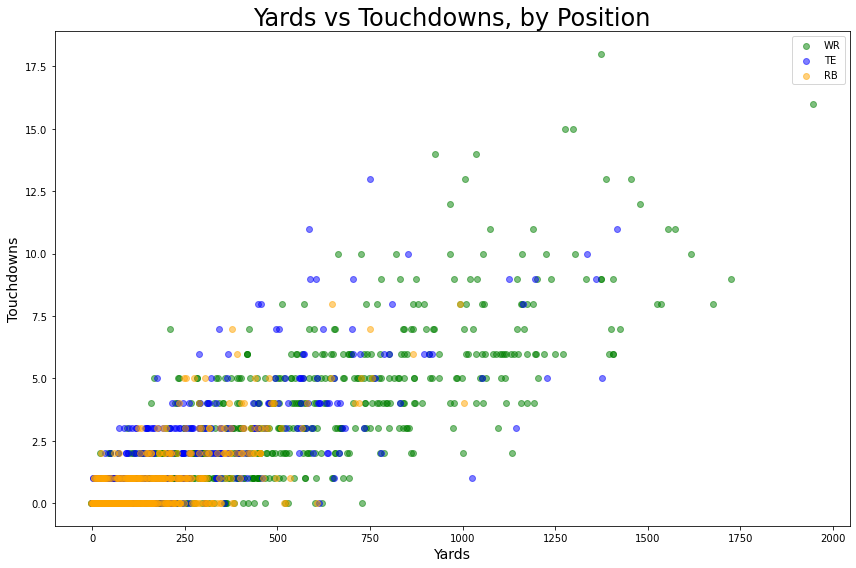

In [30]:
plt.figure(figsize = (12, 8))

isWR = df[df['Pos'] == 'WR']
isTE = df[df['Pos'] == 'TE']
isRB = df[df['Pos'] == 'RB']

plt.scatter(isWR['Yds'],
            isWR['TD'],
           color = 'green', alpha = 0.5, label = 'WR')
plt.scatter(isTE['Yds'],
            isTE['TD'],
           color = 'blue', alpha = 0.5, label = 'TE')
plt.scatter(isRB['Yds'],
            isRB['TD'],
           color = 'orange', alpha = 0.5, label = 'RB')

plt.title('Yards vs Touchdowns, by Position', size = 24)
plt.xlabel('Yards', size = 14)
plt.ylabel('Touchdowns', size = 14)
plt.legend()

plt.tight_layout();
plt.savefig('../images/yards_vs_TDs_positions.png');

## Yards by Age Group and Position

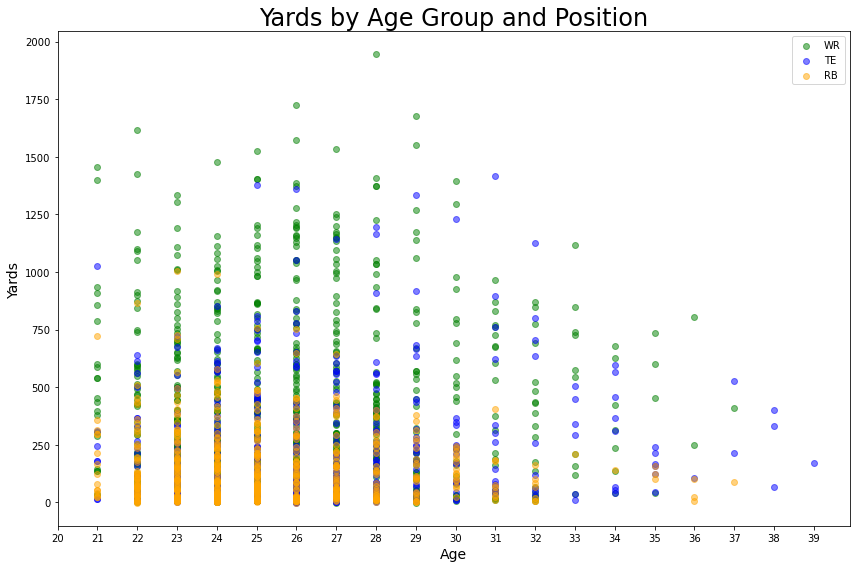

In [15]:
plt.figure(figsize = (12, 8))

isWR = df[df['Pos'] == 'WR']
isTE = df[df['Pos'] == 'TE']
isRB = df[df['Pos'] == 'RB']

plt.scatter(isWR['Age'],
            isWR['Yds'],
           color = 'green', alpha = 0.5, label = 'WR')
plt.scatter(isTE['Age'],
            isTE['Yds'],
           color = 'blue', alpha = 0.5, label = 'TE')
plt.scatter(isRB['Age'],
            isRB['Yds'],
           color = 'orange', alpha = 0.5, label = 'RB')

plt.xticks([20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])

plt.title('Yards by Age Group and Position', size = 24)
plt.xlabel('Age', size = 14)
plt.ylabel('Yards', size = 14)
plt.legend()

plt.tight_layout();
plt.savefig('../images/yards_by_age.png');

## Yardage Distribution

Average Yardage:

In [16]:
df['Yds'].mean()

279.6486193827829

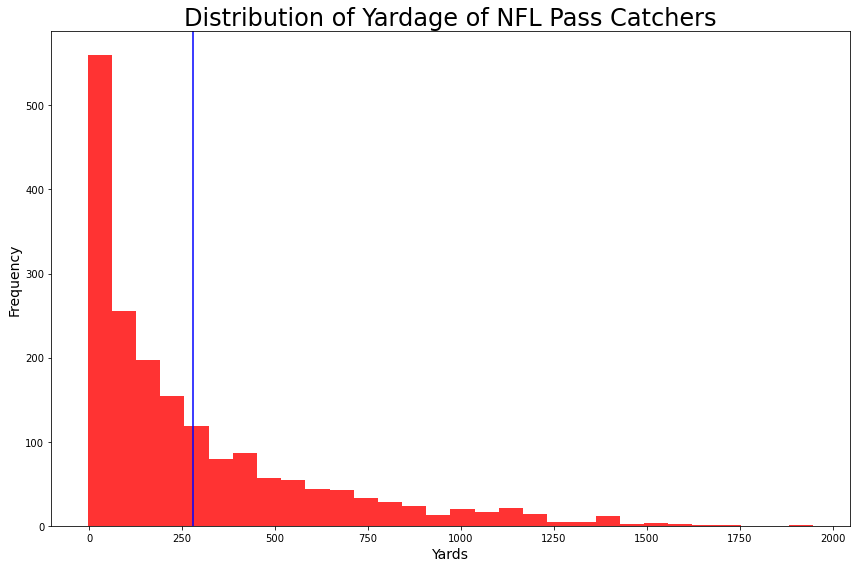

In [17]:
plt.figure(figsize = (12, 8))

plt.hist(df['Yds'], color = 'red', alpha = .8, bins = 30)
plt.axvline(x = np.mean(df['Yds']), color = 'blue')

plt.title('Distribution of Yardage of NFL Pass Catchers', size = 24);
plt.xlabel('Yards', size = 14)
plt.ylabel('Frequency', size = 14)

plt.tight_layout();
plt.savefig('../images/yardage.png');

Average Yardage per position:

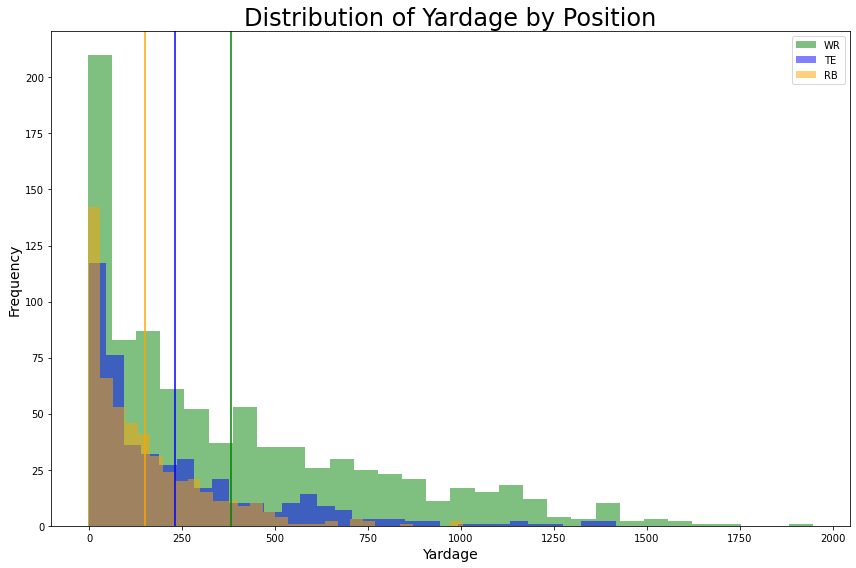

In [18]:
plt.figure(figsize = (12, 8))

isWR = df[df['Pos'] == 'WR']
isTE = df[df['Pos'] == 'TE']
isRB = df[df['Pos'] == 'RB']

plt.hist(isWR['Yds'], color = "green", alpha = .5, label = 'WR', bins = 30)
plt.axvline(x = np.mean(isWR['Yds']), color = 'green')
plt.hist(isTE['Yds'], color = "blue", alpha = .5, label = 'TE', bins = 30)
plt.axvline(x = np.mean(isTE['Yds']), color = 'blue')
plt.hist(isRB['Yds'], color = "orange", alpha = .5, label = 'RB', bins = 30)
plt.axvline(x = np.mean(isRB['Yds']), color = 'orange')
plt.legend()
plt.title('Distribution of Yardage by Position', size = 24)
plt.xlabel('Yardage', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend()

plt.tight_layout();
plt.savefig('../images/yardage_hist_by_pos.png');

In [19]:
WRAvg = isWR['Yds'].mean()
TEAvg = isTE['Yds'].mean()
RBAvg = isRB['Yds'].mean()

print(f'WR average yards: {WRAvg}')
print(f'TE average yards: {TEAvg}')
print(f'RB average yards: {RBAvg}')

WR average yards: 382.6412300683371
TE average yards: 229.93497757847533
RB average yards: 149.1414913957935


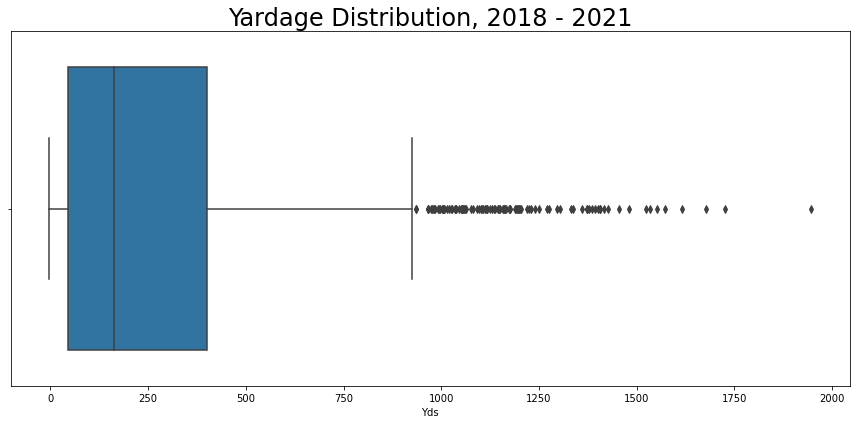

In [20]:
plt.figure(figsize = (12, 6))

plt.title('Yardage Distribution, 2018 - 2021', size = 24)
sns.boxplot(x = df['Yds'])

plt.tight_layout();
plt.savefig('../images/player_yards_boxplot.png');

## Yards Before and After Catch

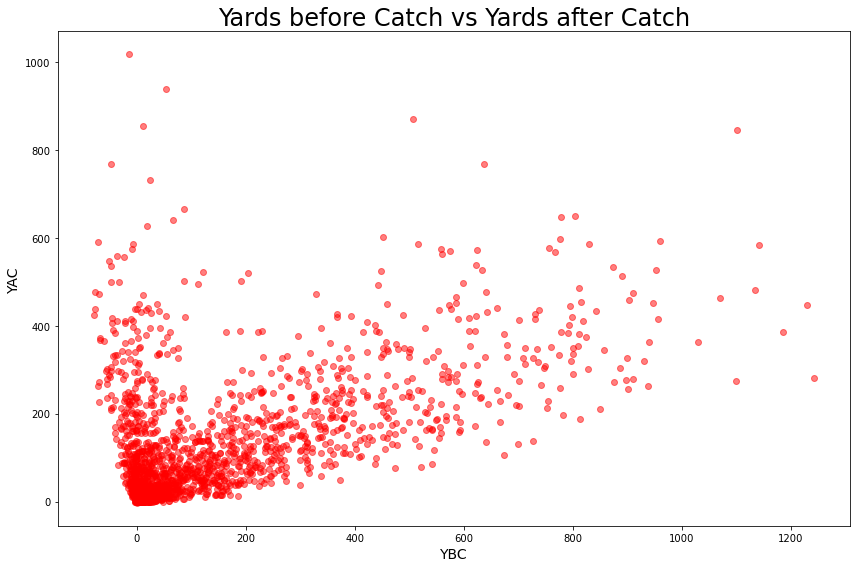

In [21]:
plt.figure(figsize = (12, 8))

plt.scatter(df['YBC'],
            df['YAC'],
           color = 'red', alpha = 0.5)

plt.title('Yards before Catch vs Yards after Catch', size = 24)
plt.xlabel('YBC', size = 14)
plt.ylabel('YAC', size = 14)


plt.tight_layout();
plt.savefig('../images/YBC_vs_YAC.png');

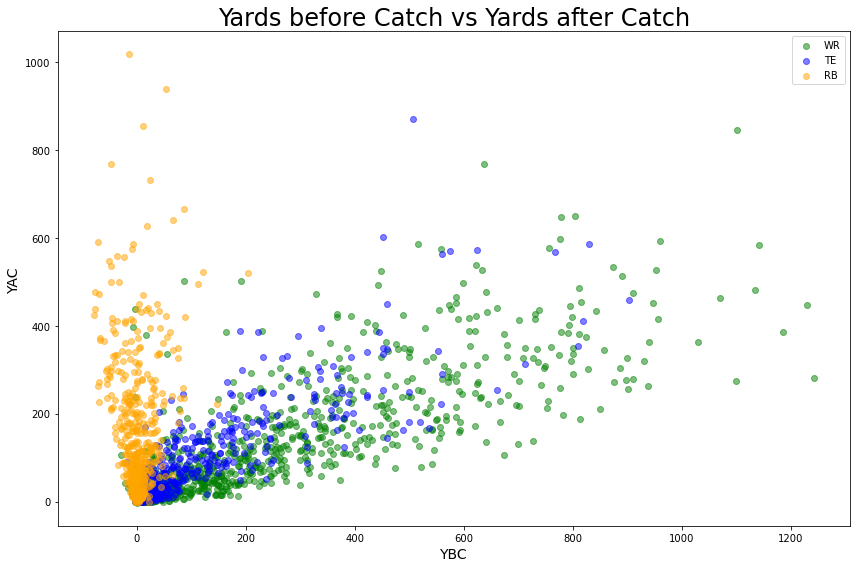

In [22]:
plt.figure(figsize = (12, 8))

isWR = df[df['Pos'] == 'WR']
isTE = df[df['Pos'] == 'TE']
isRB = df[df['Pos'] == 'RB']

plt.scatter(isWR['YBC'],
            isWR['YAC'],
           color = 'green', alpha = 0.5, label = 'WR')
plt.scatter(isTE['YBC'],
            isTE['YAC'],
           color = 'blue', alpha = 0.5, label = 'TE')
plt.scatter(isRB['YBC'],
            isRB['YAC'],
           color = 'orange', alpha = 0.5, label = 'RB')

plt.title('Yards before Catch vs Yards after Catch', size = 24)
plt.xlabel('YBC', size = 14)
plt.ylabel('YAC', size = 14)
plt.legend()

plt.tight_layout();
plt.savefig('../images/YBC_vs_YAC_postions.png');

### Top 10 Teams and Bottom 10 Teams for Yardage and TDs over 2018 through 2018

Oakland and Las Vegas are the same team.

Can we get rid of players that played for multiple teams in a season?

In [23]:
df[['Tm', 'Yds', 'TD']].groupby('Tm').sum().sort_values(by = 'TD', ascending = False).head(10)

,Yds,TD
Tm,,
KAN,19583,156
TAM,20612,152
GNB,17142,138
SEA,15404,135
MIN,16699,125
LAC,18261,125
NOR,15203,116
IND,15577,110
PIT,16256,110


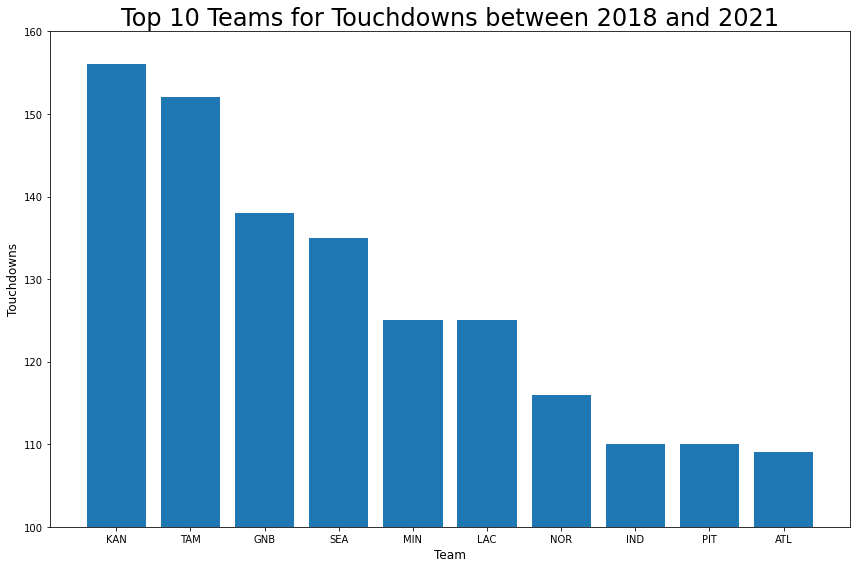

In [24]:
plt.figure(figsize = (12, 8))
top10TDs = df[['Tm', 'Yds', 'TD']].groupby('Tm').sum().sort_values(by = 'TD', ascending = False).head(10)

plt.bar(top10TDs.index.values, top10TDs['TD'])

plt.title('Top 10 Teams for Touchdowns between 2018 and 2021', size = 24)
plt.xlabel('Team', size = 12)
plt.ylabel('Touchdowns', size = 12)
plt.ylim((100, 160))

plt.tight_layout();
plt.savefig('../images/top_teams_tds.png');

In [25]:
df[['Tm', 'Yds', 'TD']].groupby('Tm').sum().sort_values(by = 'Yds', ascending = False).head(10)

,Yds,TD
Tm,,
TAM,20612,152
KAN,19583,156
LAC,18261,125
ATL,18102,109
LAR,17880,109
DAL,17390,109
GNB,17142,138
MIN,16699,125
PIT,16256,110


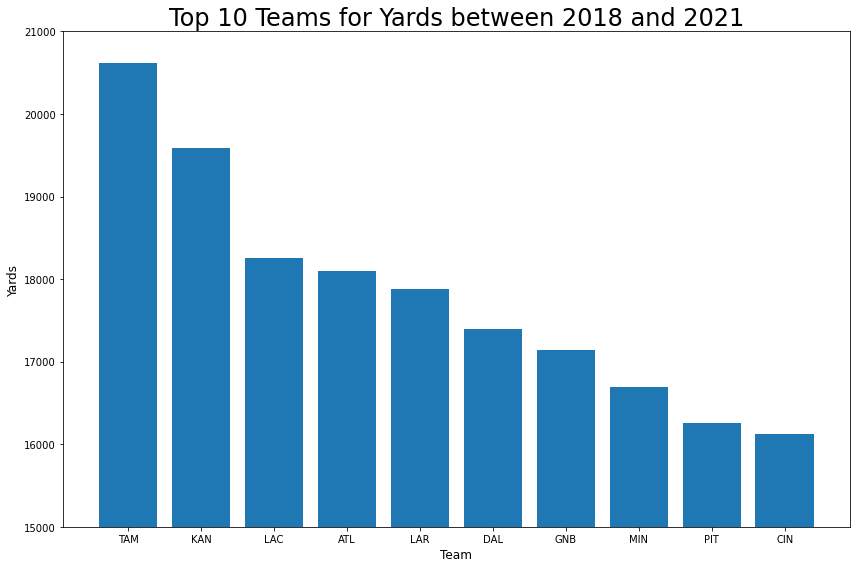

In [26]:
plt.figure(figsize = (12, 8))
top10Yds = df[['Tm', 'Yds', 'TD']].groupby('Tm').sum().sort_values(by = 'Yds', ascending = False).head(10)

plt.bar(top10Yds.index.values, top10Yds['Yds'])

plt.title('Top 10 Teams for Yards between 2018 and 2021', size = 24)
plt.xlabel('Team', size = 12)
plt.ylabel('Yards', size = 12)
plt.ylim((15000, 21000))

plt.tight_layout();
plt.savefig('../images/top_teams_yards.png');

In [27]:
df.drop(df[(df['Tm'] == '2TM') | (df['Tm'] == '3TM')].index)[['Tm', 'Yds', 'TD']].groupby('Tm').sum().sort_values(by = 'TD', ascending = False).tail(10)

,Yds,TD
Tm,,
NWE,13701,74
PHI,12029,73
JAX,13580,71
CAR,15028,71
NYJ,11957,64
DEN,12094,63
NYG,12202,60
WAS,12248,55
LVR,7740,45


In [28]:
df.drop(df[(df['Tm'] == '2TM') | (df['Tm'] == '3TM')].index)[['Tm', 'Yds', 'TD']].groupby('Tm').sum().sort_values(by = 'Yds', ascending = False).tail(10)

,Yds,TD
Tm,,
CHI,12899,76
BUF,12713,88
BAL,12287,86
WAS,12248,55
NYG,12202,60
DEN,12094,63
PHI,12029,73
NYJ,11957,64
LVR,7740,45
